In [1]:
# Import modules
import sys
import numpy as np
import matplotlib.pyplot as plt

# Import PySwarms
import pyswarms as ps

In [2]:
def convert_distance_to_tof(distances: float) -> float:
    return (1 / 299702547) * distances

In [3]:
edm_real = convert_distance_to_tof(np.matrix([[0, 7.9214, 7.914],[7.914, 0, 7.914],[7.914, 7.914, 0]]))
edm_measured = convert_distance_to_tof(np.matrix([[0, 162.1613, 162.2531],[162.1720, 0, 162.2449],[162.2155, 162.2582, 0]]))


In [4]:
print(edm_real)
print(edm_measured)

[[0.00000000e+00 2.64308731e-08 2.64061820e-08]
 [2.64061820e-08 0.00000000e+00 2.64061820e-08]
 [2.64061820e-08 2.64061820e-08 0.00000000e+00]]
[[0.00000000e+00 5.41074147e-07 5.41380451e-07]
 [5.41109849e-07 0.00000000e+00 5.41353090e-07]
 [5.41254993e-07 5.41397468e-07 0.00000000e+00]]


In [4]:
def distance_func(delay_candidates):
    row, column = edm_measured.shape
    edm_candidate = np.empty((row, column))
    for i in range(0, row):
        for j in range(0, column):
            if edm_measured[i, j] != 0:
                edm_candidate[i, j] = (
                    (4 * edm_measured[i, j])
                    - (
                        (2 * delay_candidates[i])
                        + (2 * delay_candidates[j])
                    )
                ) / 4.0
            else:
                edm_candidate[i, j] = 0
    norm_diff = np.linalg.norm(edm_real - edm_candidate)
    return norm_diff


def opt_func(X):
    n_particles = X.shape[0]
    dist = [distance_func(X[i]) for i in range(n_particles)]
    return dist

In [21]:
from pyswarms.utils.plotters.formatters import Mesher, Designer
from pyswarms.utils.plotters import plot_cost_history, plot_contour, plot_surface
import matplotlib.pyplot as plt
# Plot the sphere function's mesh for better plots
m = Mesher(func=opt_func)
# Adjust figure limits
d = Designer(limits=[(400e-9,650e-9), (400e-9,650e-9)],
             label=['x-axis', 'y-axis'])

2024-02-21 14:03:02,964 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.3}
pyswarms.single.global_best:   0%|          |0/100, best_cost=1.28e-8

pyswarms.single.global_best: 100%|██████████|100/100, best_cost=1.21e-10
2024-02-21 14:03:03,503 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.2076177896093146e-10, best pos: [5.14541997e-07 5.14774304e-07 5.15220979e-07]


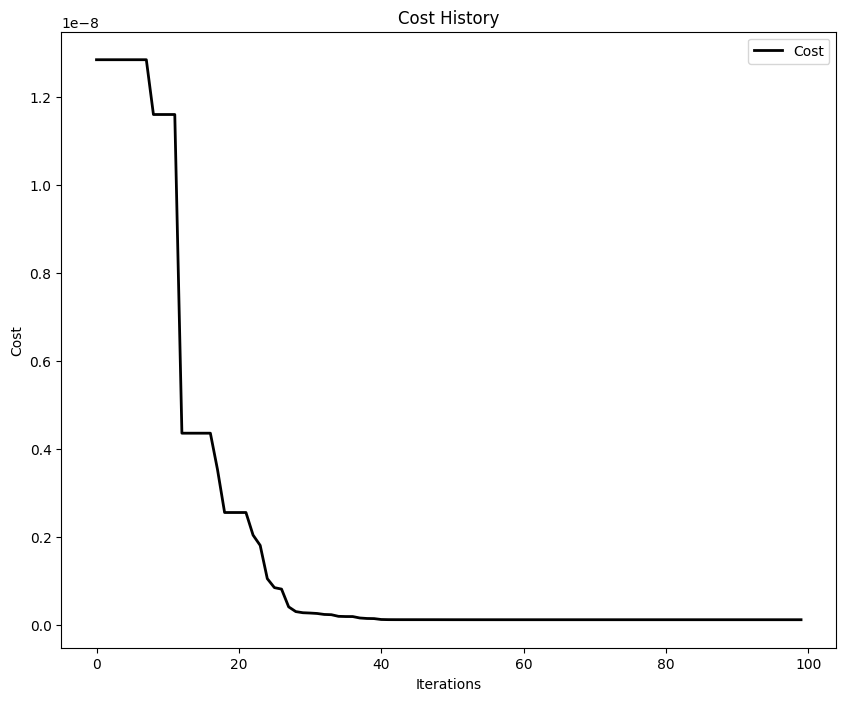

IndexError: index 2 is out of bounds for axis 0 with size 2

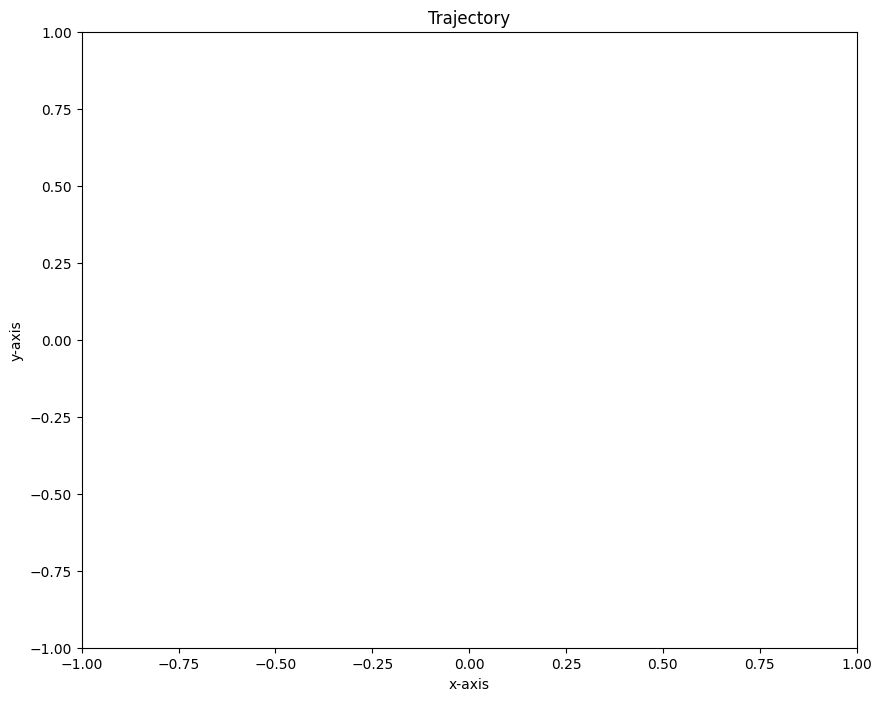

In [23]:
%%time
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.3}
bounds = ([450e-9, 450e-9, 450e-9], [600e-9, 600e-9, 600e-9])

# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=3, options=options, bounds=bounds)

# Perform optimization
cost, pos = optimizer.optimize(opt_func, iters=100)
plot_cost_history(optimizer.cost_history)
plt.show()
plot_contour(pos_history=optimizer.pos_history, mesher=m, mark=(0,0))

In [19]:
print(pos)

[5.14620409e-07 5.14733523e-07 5.15202159e-07]


In [20]:
print(cost)

1.0346927010612789e-10
